In [2]:
import pandas as pd
import numpy as np

In [12]:
import seaborn as sns

In [119]:
df = pd.read_csv('real_estatesv7.csv')

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18504 entries, 0 to 18503
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        18504 non-null  object 
 1   bhk                  18504 non-null  object 
 2   price                18504 non-null  float64
 3   price_per_sqft       18504 non-null  float64
 4   super_built_up_area  6586 non-null   float64
 5   carpet_area          18504 non-null  float64
 6   bedroom              18465 non-null  float64
 7   bathroom             17781 non-null  float64
 8   balconies            8521 non-null   float64
 9   status               15796 non-null  object 
 10  transaction_type     18497 non-null  object 
 11  furnished_status     16811 non-null  object 
 12  address              18504 non-null  object 
 13  facing               10653 non-null  object 
 14  floorNum             15759 non-null  float64
 15  society              11855 non-null 

In [35]:
df.drop(columns=['lats', 'longs', 'link','amenities','bhk','facing'], inplace=True)

In [5]:
df.head()

,property_type,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,transaction_type,furnished_status,address,floorNum,society,additional_room,localities,regions,luxury_score
0,flat,0.52,4333.0,NaN,1200.0,3.0,2.0,NaN,ready to move,resale,unfurnished,Kammasandra Main Road Shree Ananth Nagar Layou...,4.0,NaN,NaN,electronic city phase 2,bangalore,NaN
1,flat,1.64,12753.0,1608.0,1286.0,3.0,3.0,NaN,under construction,new property,unfurnished,"Sarjapur Road, Bangalore - South, Karnataka",NaN,dsr the address,NaN,sarjapur road,bangalore,26.85
2,flat,1.41,14915.0,NaN,952.0,2.0,2.0,2.0,ready to move,new property,unfurnished,"Begur - Koppa Rd, Suraksha nagar, Yelenahalli,...",4.0,NaN,NaN,begur hulimavu road,bangalore,NaN
3,flat,0.67,5940.0,1410.0,1128.0,3.0,2.0,NaN,ready to move,new property,unfurnished,"Electronic City, Bangalore, Electronics City P...",1.0,sri sai nandana royal,NaN,electronics city phase 1,bangalore,NaN
4,villa,1.05,10938.0,1200.0,960.0,3.0,3.0,2.0,ready to move,new property,unfurnished,"Jigani, Chandapura, Bangalore - South, Karnataka",NaN,NaN,1 study room,chandapura,bangalore,NaN


## price

In [41]:
df['price'].describe()

count    18504.000000
mean         2.257887
std          6.739106
min          0.010000
25%          0.800000
50%          1.380000
75%          2.500000
max        813.510000
Name: price, dtype: float64

In [120]:

outlier_lower = df[(df['price'] < 0.25)].sort_values(by='price', ascending=False)

In [121]:
outlier_upper = df[(df['price'] > 22) & (df['bedroom'] == 2)].sort_values(by='price', ascending=False)

In [122]:
df.drop(outlier_lower.index, inplace=True)
df.drop(outlier_upper.index, inplace=True)

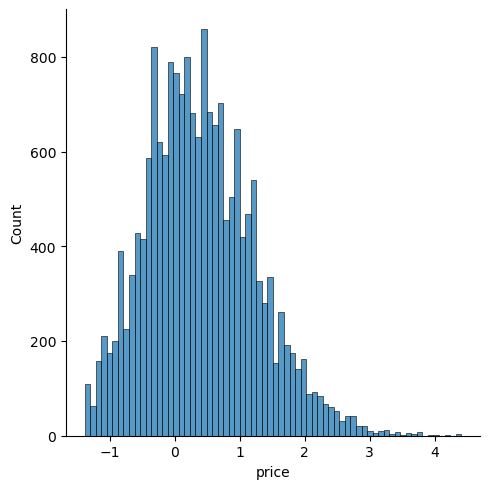

In [50]:
sns.displot(np.log(df['price']))

## price_per_sqrft

In [53]:
df['price_per_sqft'].describe().round(2)

count      18352.00
mean       15959.48
std        14579.45
min          140.00
25%         8828.00
50%        12811.50
75%        19000.00
max      1066667.00
Name: price_per_sqft, dtype: float64

In [123]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe().round(2)

num_outliers, outliers_sqft_stats

(1080,
 count       1080.00
 mean       51634.27
 std        39156.62
 min        34266.00
 25%        37500.00
 50%        43003.00
 75%        54191.25
 max      1066667.00
 Name: price_per_sqft, dtype: float64)

In [73]:
upper_bound

34258.0

In [124]:
price_per_sqft_outlier_lower =  df[df['price_per_sqft'] < 2000]

In [125]:
upper_outlier_removal = df[(df['price_per_sqft'] > upper_bound) & (df['carpet_area'] < 600)]

In [126]:
df.drop(price_per_sqft_outlier_lower.index, inplace=True)
df.drop(upper_outlier_removal.index, inplace=True)

## carpet_area

In [101]:
df['carpet_area'].describe()

count     18226.000000
mean       1353.680801
std        1590.072971
min          83.000000
25%         765.000000
50%        1050.000000
75%        1510.000000
max      130680.000000
Name: carpet_area, dtype: float64

In [127]:
Q1 = df['carpet_area'].quantile(0.25)
Q3 = df['carpet_area'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [128]:
outlier_to_remove = df[df['carpet_area']  < 250].sort_values('carpet_area')

In [129]:
df.drop(outlier_to_remove.index, inplace=True)

In [131]:
df.to_csv('real_estatesv8.csv', index=False)